In [1]:
# import libraries
from music21 import *
from random import random, randint
import matplotlib.pyplot as plt
import numpy as np
import math
from math import pi

In [2]:
# shortcut to play a stream
def play(stream):
    midi.realtime.StreamPlayer(stream).play()

# Stagnation
## What is stagnation ?
We can see a stagnation in 2 different ways: constance and periodicity.
### Constance
We can think about stagnation with something which is constant over time, like a note or a sound. However, this is kind of boring and it's not something interesting I want to focus on.
### Periodicity
Another way to see stagnation is a cycle which is repeated indefinitely. The cycle can be anything, like a suite of notes, chords... This seems to be interesting to dive in.
## Cycle
The first task is to find something (not necessarily related to music) which is cyclic. I found interesting to play with mathematical periodic functions. There exist an infinite number of periodic functions. But I want to work with basic cosine and sine. 

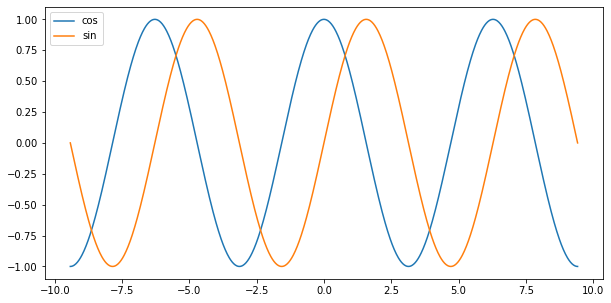

In [3]:
# Plot cosine and sinus
xplot = np.linspace(-3 * pi, 3 * pi, 1000)
yCos = np.cos(xplot)
ySin = np.sin(xplot)
figCos = plt.figure(figsize = (10, 5))
plt.plot(xplot, yCos, label = "cos")
plt.plot(xplot, ySin, label = "sin")
plt.legend()
plt.show()

## Base
One simple idea is to directly convert the shape of the functions into notes and therefore obtaining a suite of notes.

In [21]:
# function returning array with char of notes of the major scale
def getMajorScale(note):
    return [str(n) for n in scale.MajorScale(note).getPitches('C3', 'C5')]

# array of notes
scl = getMajorScale('C')
print(scl)
speed = 0.5

['C3', 'D3', 'E3', 'F3', 'G3', 'A3', 'B3', 'C4', 'D4', 'E4', 'F4', 'G4', 'A4', 'B4', 'C5']


In [22]:
# define x values
step = pi / len(scl)
min = -pi
max = pi
numberOfPoints = abs(max - min) / step
x = np.linspace(min, max, int(numberOfPoints))

In [23]:
# function that return notes given graph
def graphToNotes(y, scl):
    dictNotes = {}
    # attribute notes to values
    for i in range(len(scl)):
        dictNotes[y[i]] = scl[i]
    notes = []
    for i in range(len(y)):
        notes.append(dictNotes[y[i]])
    return notes
        
notesCharCos = graphToNotes(np.around(np.cos(x), decimals = 3), scl)
notesCos = [note.Note(n, quarterLength = speed) for n in notesCharCos * 10]
notesCharSin = graphToNotes(np.around(np.sin(x + max / 2), decimals = 3), scl)
notesSin = [note.Note(n, quarterLength = speed) for n in notesCharSin * 10]

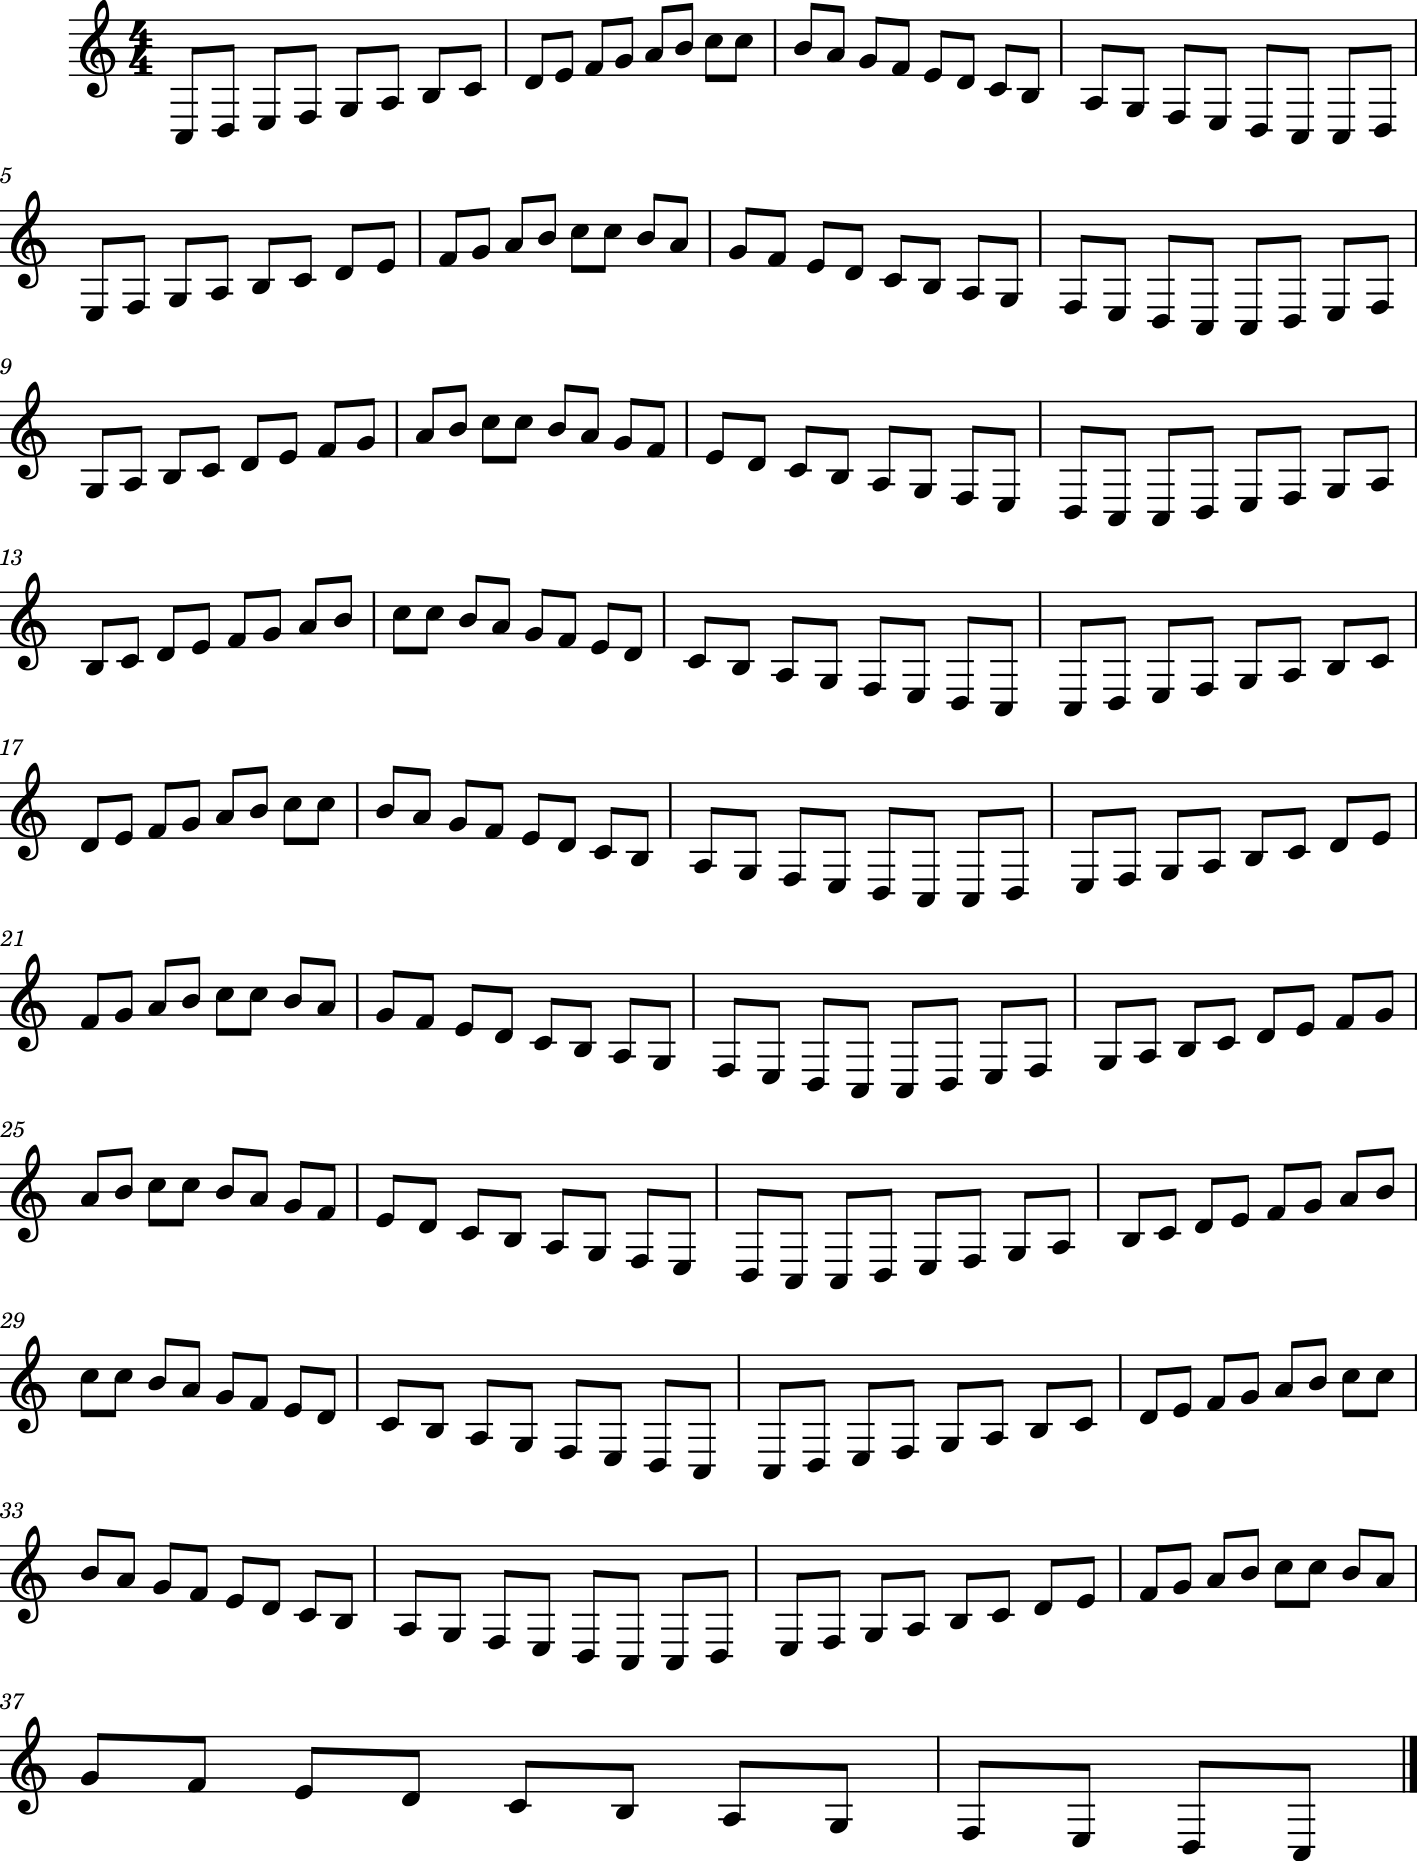

In [24]:
# cos
s = stream.Stream()
s.append(notesCos)
s.show()

In [25]:
#play(s)

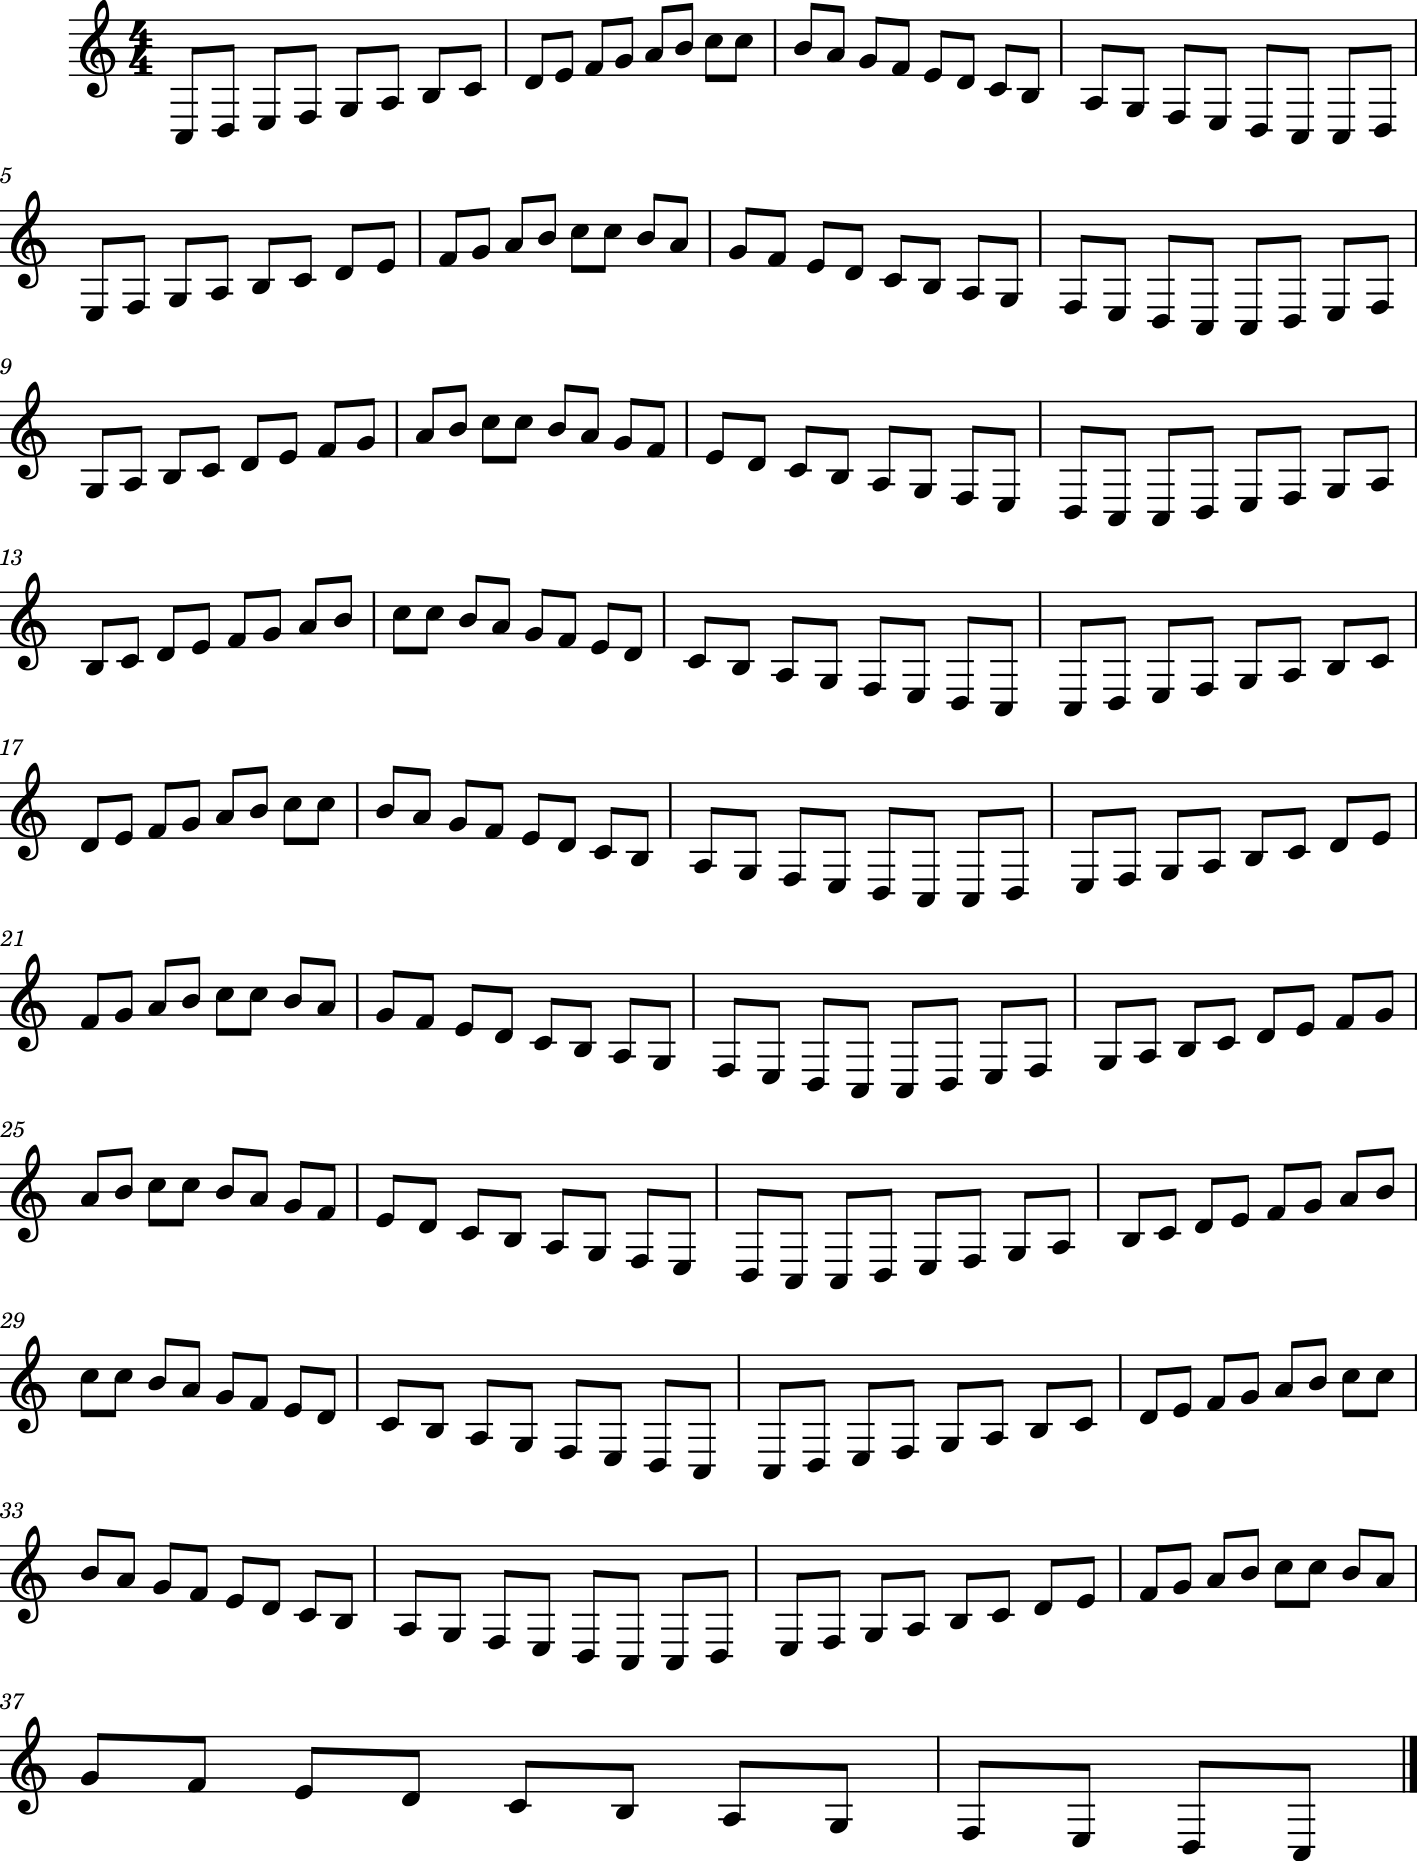

In [26]:
# sin
s = stream.Stream()
s.append(notesSin)
s.show()

In [27]:
#play(s)

## Combine
They seem to be similar, it's correct, this is because did not consider the same interval of x when plotting.
If we now combine them, we will shift the cos to start correctly from -pi/2

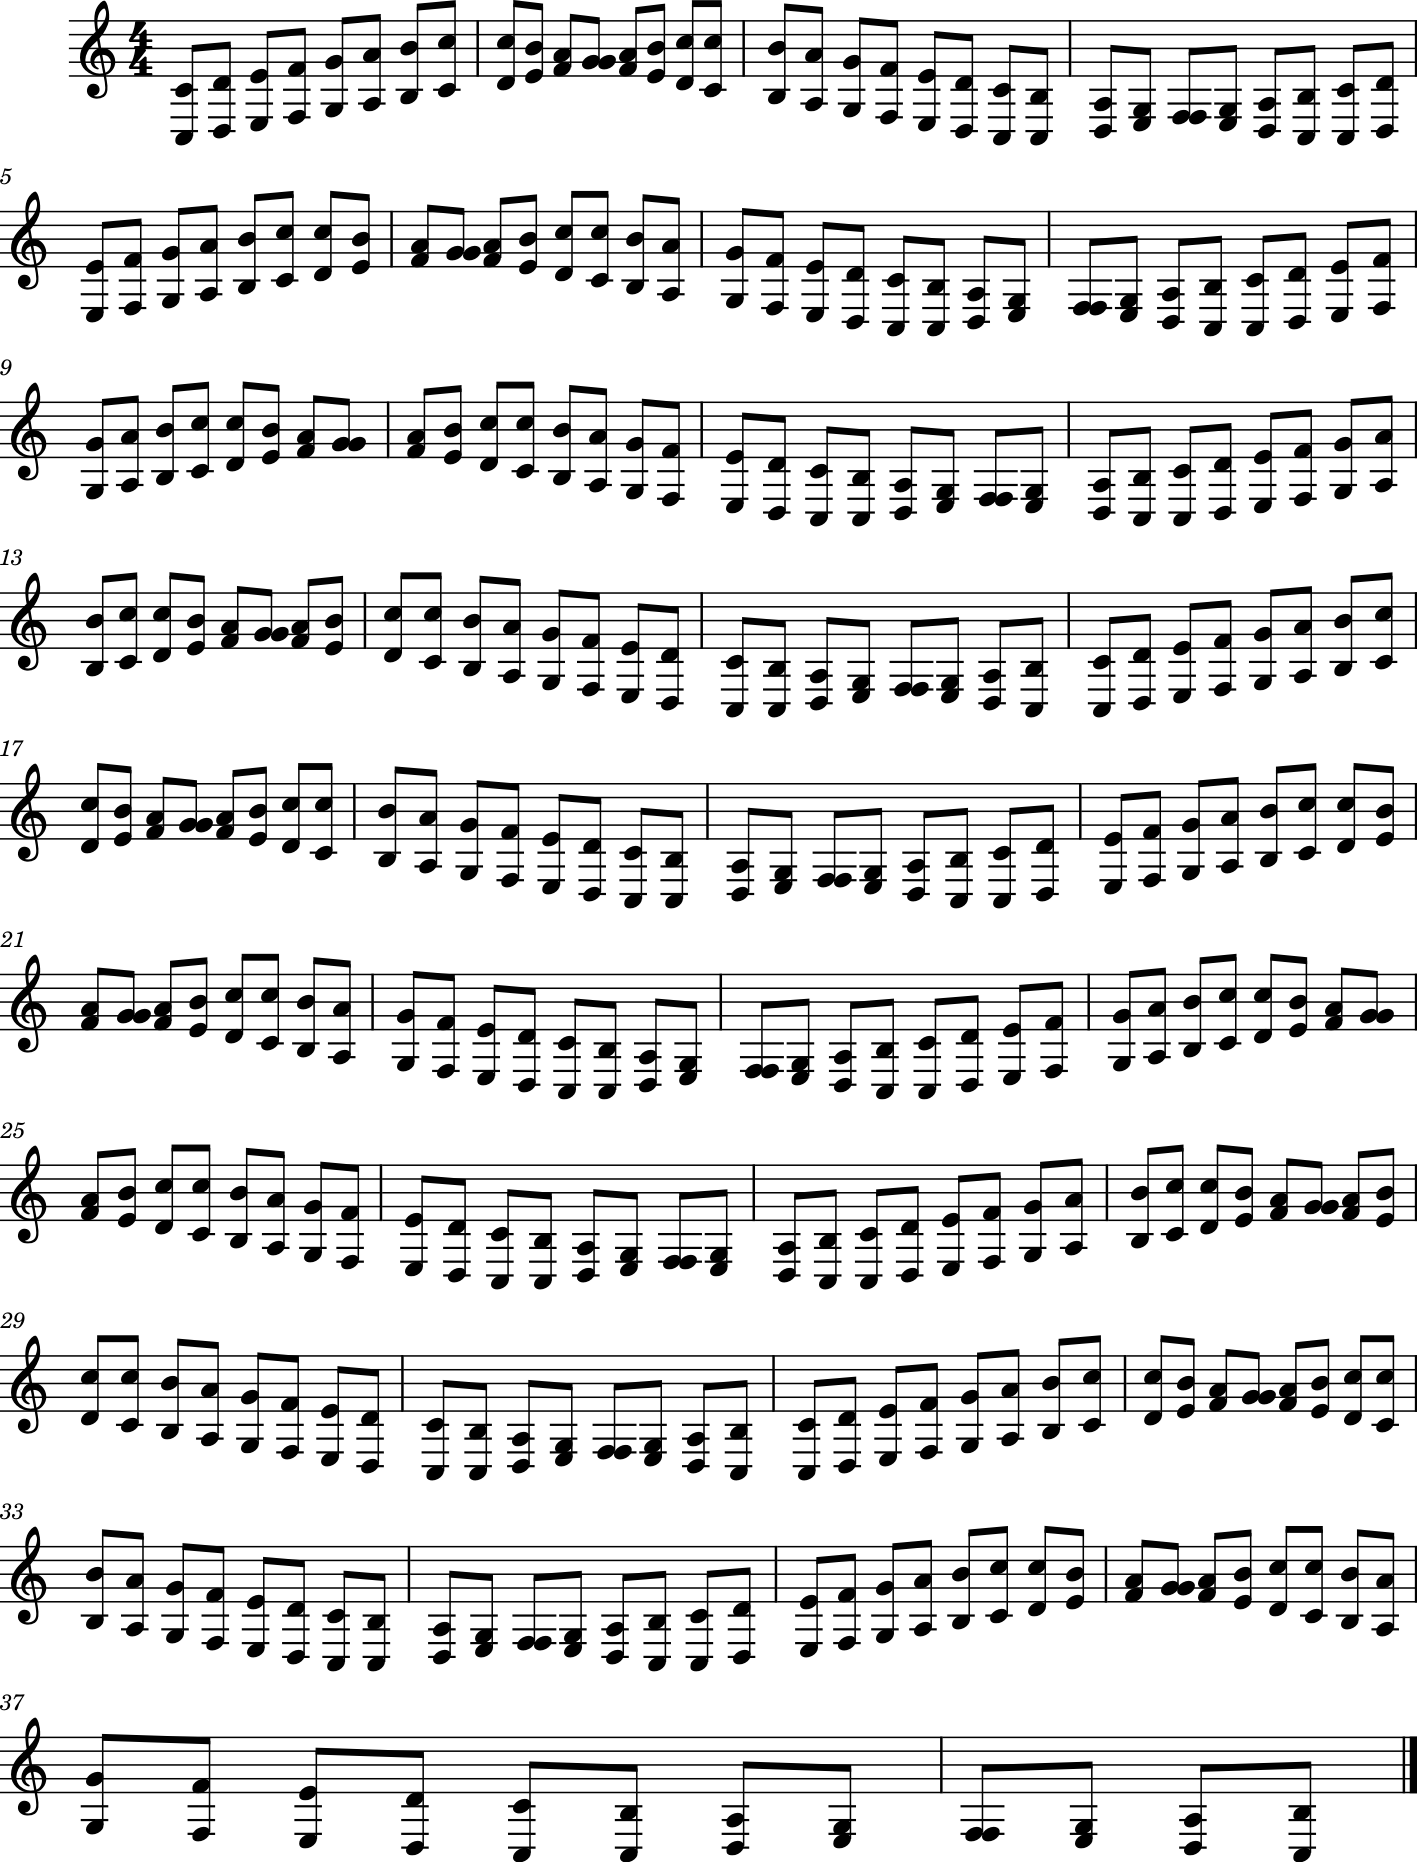

In [28]:
s = stream.Stream()
s.append(meter.TimeSignature('4/4'))
s.append([chord.Chord([notesCos[(i + 7) % len(notesCos)], notesSin[i]]) for i in range(len(notesCos))])
s.show()

In [29]:
#play(s)

Moreover, we can make a combination between cos(x), sin(x), cos(2x), sin(2x)

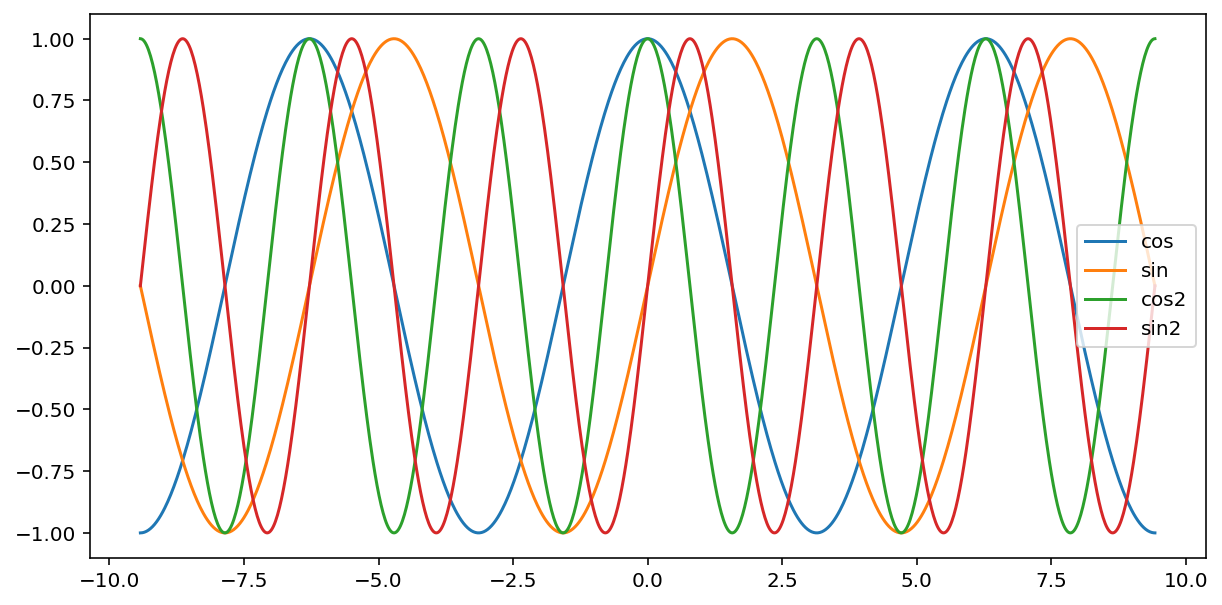

In [30]:
# Plot the 4 functions
xplot = np.linspace(-3 * pi, 3 * pi, 1000)
yCos = np.cos(xplot)
ySin = np.sin(xplot)
yCos2 = np.cos(2 * xplot)
ySin2 = np.sin(2 * xplot)
figCos = plt.figure(figsize = (10, 5))
plt.plot(xplot, yCos, label = "cos")
plt.plot(xplot, ySin, label = "sin")
plt.plot(xplot, yCos2, label = "cos2")
plt.plot(xplot, ySin2, label = "sin2")
plt.legend()
plt.show()

In [31]:
notesCharCos2 = graphToNotes(np.around(np.cos(2 * x), decimals = 3), scl)
notesCos2 = [note.Note(n, quarterLength = speed) for n in notesCharCos2 * 5]
notesCharSin2 = graphToNotes(np.around(np.sin(2 * x + max / 2), decimals = 3), scl)
notesSin2 = [note.Note(n, quarterLength = speed) for n in notesCharSin2 * 5]

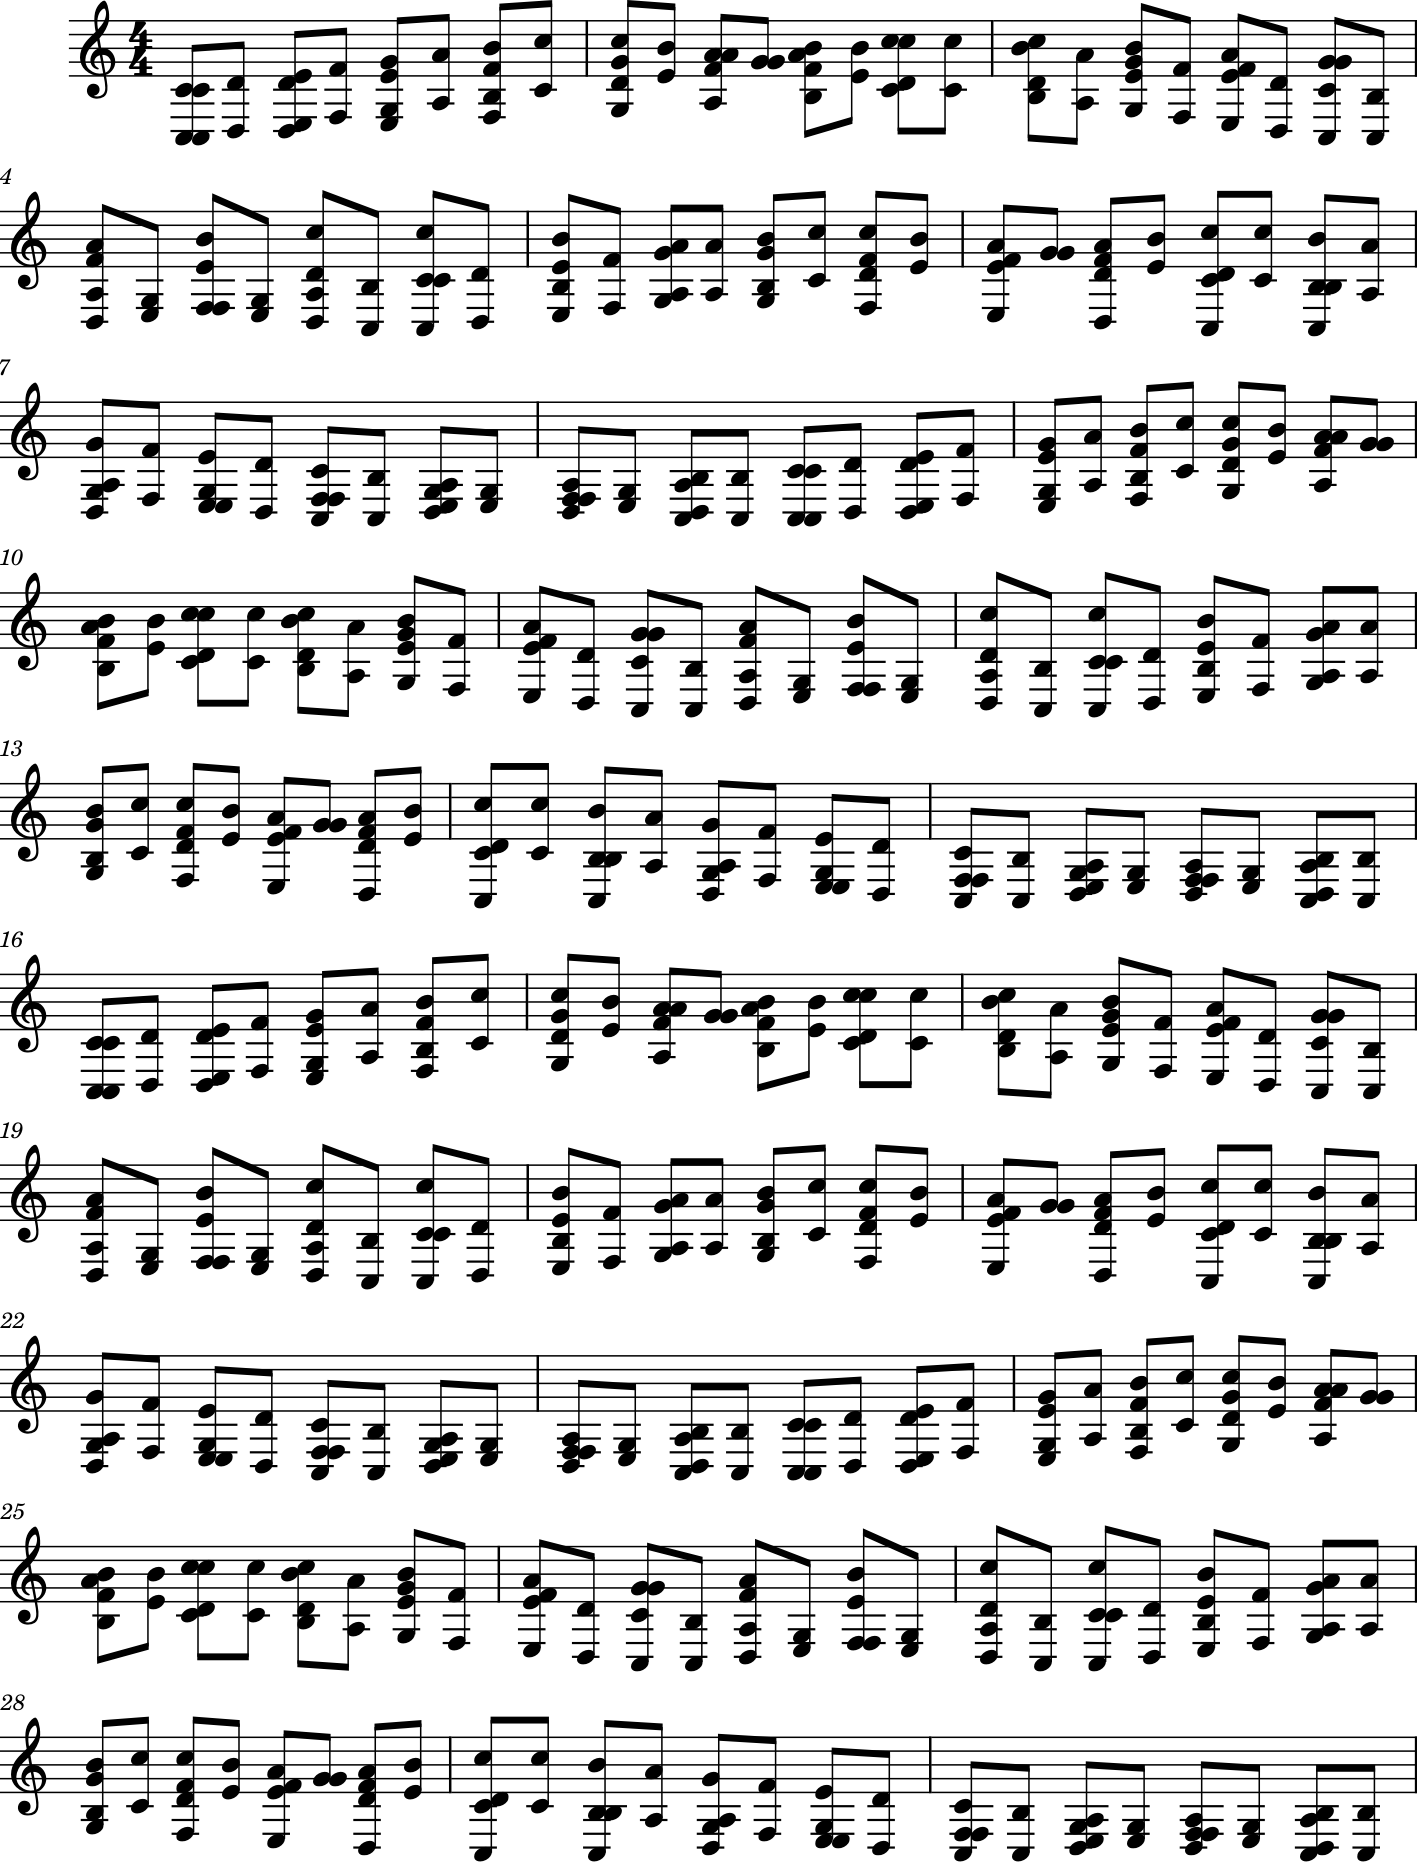

In [32]:
s = stream.Stream()
s.append(meter.TimeSignature('4/4'))
for i in range(len(notesCos2)):
    s.append(chord.Chord([notesCos2[(i + 7) % len(notesCos2)], notesSin2[i], notesCos[(2 * i + 7) % len(notesCos)], notesSin[2 * i]]))
    s.append(chord.Chord([notesCos[(2 * i + 1 + 7) % len(notesCos)], notesSin[2 * i + 1]]))
s.show()

In [33]:
play(s)